<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

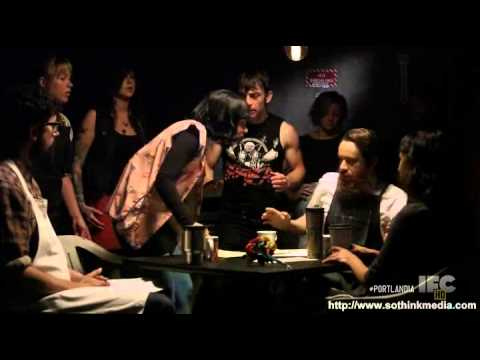

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [6]:
import pandas as pd

url = "./data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [22]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))

In [17]:
import spacy

nlp = spacy.load("en_core_web_lg")

STOP_WORDS = nlp.Defaults.stop_words.union([' ', '  ', '   ', '    '])


def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc[2:]: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
            

    return lemmas

In [18]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [23]:
shops.sample(10)

,coffee_shop_name,full_review_text,star_rating,lemmas
6313,Pacha,5/19/2016 2 check-ins Best pancakes and coffe...,5,"[2, check, in, good, pancake, coffee, long, ti..."
6006,La Tazza Fresca,12/15/2013 1 check-in Great place to study wi...,4,"[1, check, great, place, study, plenty, plug, ..."
4643,Elixer Coffee,6/19/2013 I love this place. Everyone who wor...,5,"[love, place, work, friendly, kid, pride, prod..."
1135,The Factory - Cafe With a Soul,10/16/2016 My only complaint and desire and h...,5,"[complaint, desire, heart, wish, place, open, ..."
5503,Radio Coffee & Beer,12/10/2014 1 check-in I'm so late to this par...,5,"[1, check, late, party, fashionable, holy, cof..."
2516,Caffé Medici,6/12/2015 Conveniently located in downtown Au...,4,"[conveniently, locate, downtown, Austin, small..."
4904,The Buzz Mill,5/25/2015 I am an Uber driver so I like frequ...,1,"[uber, driver, like, frequent, coffee, shop, p..."
7387,Live Oak Market,12/6/2012 90 check-ins Love Live Oak Market! ...,5,"[90, check, in, Love, Live, Oak, Market, live,..."
891,Legend Coffee,7/1/2015 I love a good coffee so came over to...,5,"[love, good, coffee, come, try, cold, brew, sp..."
5784,Picnik Austin,3/5/2016 Wow. Holy goodness and all PALEO!!! ...,5,"[wow, holy, goodness, PALEO, heart, smile, rea..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [24]:
good = shops[shops['star_rating']>=4]
bad = shops[shops['star_rating']<4]

In [15]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')


In [26]:
good_wc = count(good['lemmas'])
good_wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,coffee,3906,8008,1.0,0.028340,0.028340,0.636156
82,place,3120,4801,2.0,0.016990,0.045330,0.508143
210,good,2929,4341,3.0,0.015362,0.060692,0.477036
112,great,2492,3449,4.0,0.012206,0.072898,0.405863
24,check,2686,2942,5.0,0.010412,0.083310,0.437459
178,like,1677,2434,6.0,0.008614,0.091923,0.273127
17,love,1565,2053,7.0,0.007265,0.099189,0.254886
49,Austin,1544,1988,8.0,0.007035,0.106224,0.251466
391,come,1480,1988,9.0,0.007035,0.113260,0.241042
4,1,1722,1805,10.0,0.006388,0.119647,0.280456


In [30]:
bad_wc = count(bad['lemmas'])
bad_wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
2,coffee,925,2099,1.0,0.026517,0.026517,0.626694
35,place,752,1225,2.0,0.015476,0.041992,0.509485
37,good,647,1000,3.0,0.012633,0.054626,0.438347
0,like,596,945,4.0,0.011938,0.066564,0.403794
102,order,430,759,5.0,0.009589,0.076152,0.291328
135,come,452,650,6.0,0.008212,0.084364,0.306233
219,time,423,613,7.0,0.007744,0.092108,0.286585
32,drink,364,610,8.0,0.007706,0.099814,0.246612
96,check,488,526,9.0,0.006645,0.106459,0.330623
75,food,319,497,10.0,0.006279,0.112738,0.216125


In [32]:
bad_wc[bad_wc['word'] == 'nice']

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,nice,293,364,22.0,0.004598,0.176043,0.198509


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

